In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Carga de datos
data = pd.read_csv('/Users/servandolopez/Documents/Proyectos/climatesim/data/raw/jojutlaestacion17031.csv')

print(data.head(), '\n')
print(data.info(), '\n')
print(data.describe())

        FECHA  PRECIP  EVAP  TMAX  TMIN
0  01/03/1977     0.0   6.9  32.0  11.0
1  02/03/1977     0.0   7.2  32.0  12.0
2  03/03/1977     0.0   8.9  33.0  12.0
3  04/03/1977     0.0   6.1  33.0  11.0
4  05/03/1977     0.0   5.2  35.0  12.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   14520 non-null  object 
 1   PRECIP  14520 non-null  float64
 2   EVAP    12811 non-null  float64
 3   TMAX    14463 non-null  float64
 4   TMIN    14520 non-null  float64
dtypes: float64(4), object(1)
memory usage: 567.3+ KB
None 

             PRECIP          EVAP          TMAX          TMIN
count  14520.000000  12811.000000  14463.000000  14520.000000
mean       2.461804      5.176520     33.369322     15.268740
std        7.256125      1.688509      3.063514      3.861298
min        0.000000      0.200000     17.500000      2.000000
25%        0.000000 

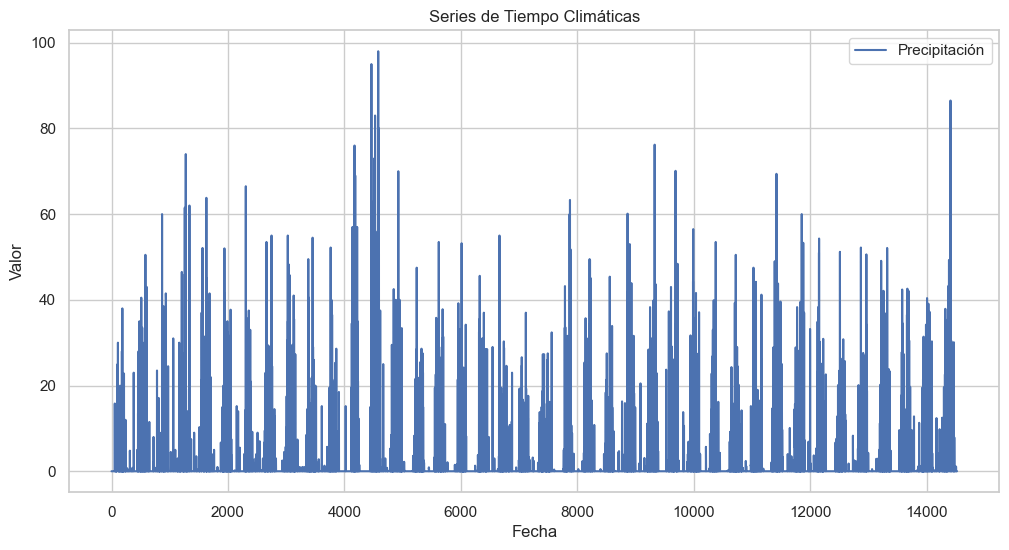

In [24]:
sns.set(style='whitegrid')
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(data['PRECIP'], label='Precipitación')
plt.title('Series de Tiempo Climáticas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [72]:
#Con el proposito de simplicar los datos y eliminar ruido del dataset, se tomarán los promedios mensuales del nivel de cada una de las variables
data_mean = data.groupby(pd.PeriodIndex(data['FECHA'], freq="W"))[['PRECIP', 'EVAP', 'TMIN', 'TMAX']].mean().dropna()

In [69]:
#Ahora normalizamos las variables
scaler = MinMaxScaler(feature_range=(0, 1))
data_master = pd.DataFrame(scaler.fit_transform(data_mean))

In [70]:
data_master.columns = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
data_master

,PRECIP,EVAP,TMAX,TMIN
0,0.098605,0.650000,0.707965,0.543103
1,0.247442,0.168485,0.581121,0.321839
2,0.000000,0.686061,0.617257,0.543103
3,0.001628,0.389091,0.735988,0.392241
4,0.000000,0.813333,0.632743,0.663793
...,...,...,...,...
1872,0.000000,0.336364,0.429204,0.581897
1873,0.089302,0.252727,0.876106,0.543103
1874,0.005116,0.225455,0.548673,0.663793
1875,0.000000,0.301818,0.455752,0.599138


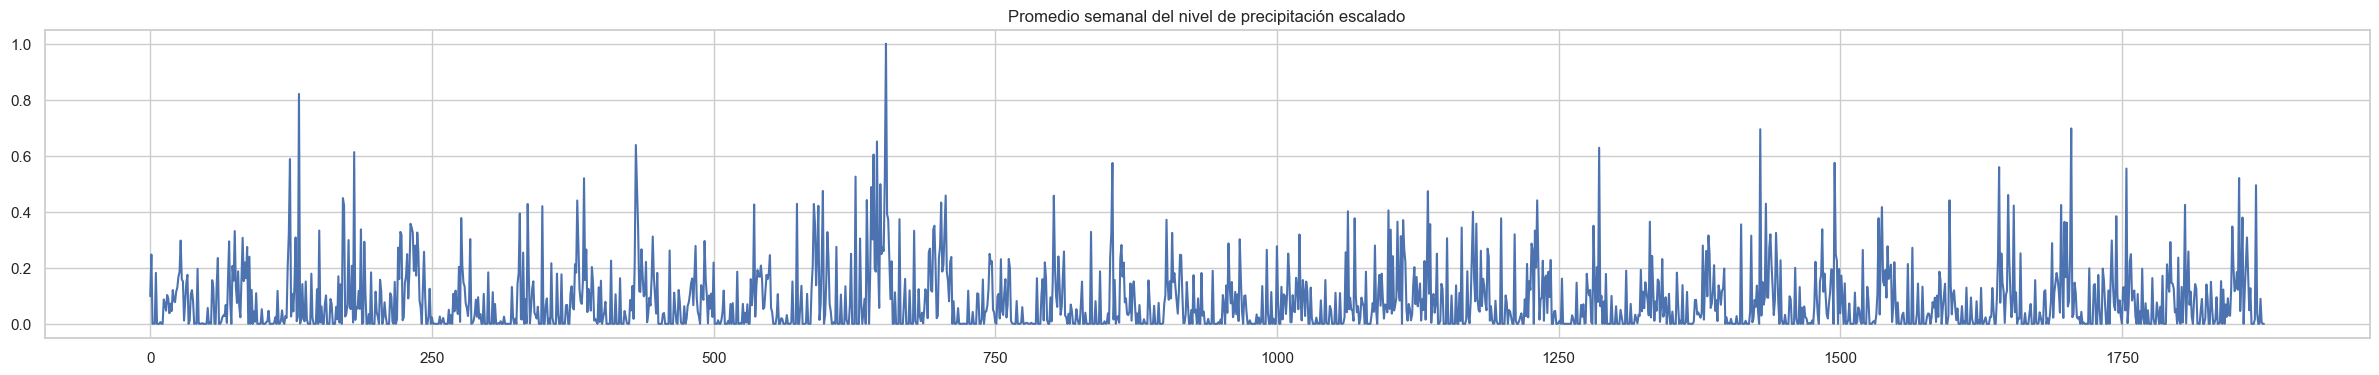

In [74]:
plt.figure(figsize=(30, 4))
plt.plot(data_master['PRECIP'])
plt.title('Promedio semanal del nivel de precipitación escalado')
plt.show()

In [71]:
data_master.to_csv('/Users/servandolopez/Documents/Proyectos/climatesim/data/processed/processed_data.csv')